In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import warnings
warnings.filterwarnings('ignore')

# scikit-learn 관련
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# 변수 별 분석하기

## booking_status(target)

In [ ]:
df['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

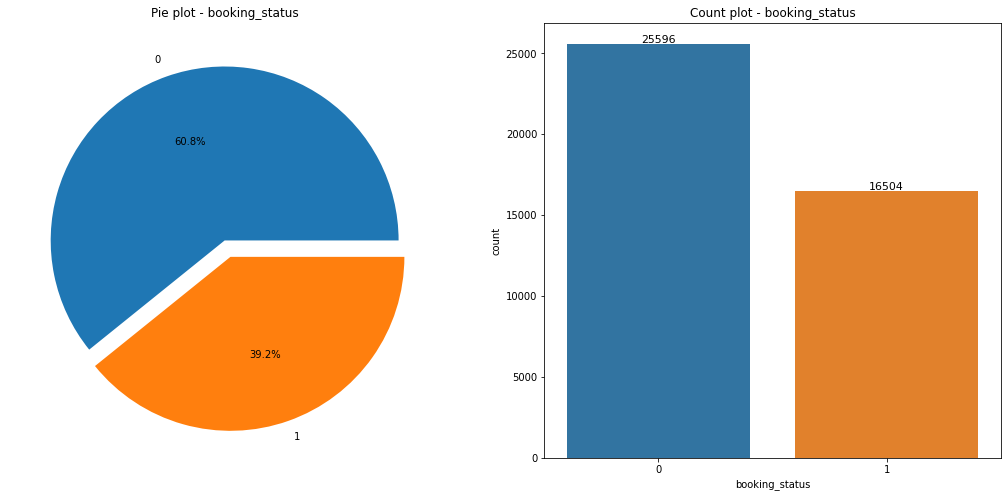

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))


df['booking_status'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Pie plot - booking_status')
ax[0].set_ylabel('')

ax[1].set_title('Count plot - booking_status')
ax = sns.countplot(data = df, x = 'booking_status', ax = ax[1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 11)

plt.show()

* 예약 취소를 하지 않은 팀이 42100팀 중에 25596팀으로 60.8%이다.
* 예약 취소를 한 팀이 42100팀 중에 16504팀으로 39.2%이다.

## value_counts()로 데이터 살펴보기

In [ ]:
df['no_of_adults'].value_counts().sort_index()

0      167
1     7089
2    30771
3     4061
4       12
Name: no_of_adults, dtype: int64

* 어른 수는 0 ~ 4명으로 구성되어 있다.
* 대부분 어른 수는 2명이다.

In [ ]:
df['no_of_children'].value_counts().sort_index()

0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64

* 어린이 수는 0 ~ 9명으로 구성되어 있다.
* 대부분 어린이 수는 0명이다.

In [ ]:
df['no_of_weekend_nights'].value_counts().sort_index()

0    18137
1    11389
2    12143
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64

* 주말 숙박 수가 7번이면 호텔에 3주 묵은 것인가??

In [ ]:
df['no_of_week_nights'].value_counts().sort_index()

0      1937
1      9558
2     12905
3     10286
4      4175
5      2573
6       237
7       160
8        84
9        53
10       82
11       16
12        9
13        5
14        3
15       11
16        4
17        2
Name: no_of_week_nights, dtype: int64

* 평일 숙박 수가 17번이면 3주 묵은 것인가?
    * 데이터 내 최대로 숙박을 오래한 사람은 3주 정도

In [ ]:
df['type_of_meal_plan'].value_counts().sort_index()

0    35463
1     3210
2     3421
3        6
Name: type_of_meal_plan, dtype: int64

* 식사 유형은 총 4가지가 있다. 어떤 기준으로 분류된건지는 알 수 없음.

In [ ]:
df['required_car_parking_space'].value_counts().sort_index()

0    41037
1     1063
Name: required_car_parking_space, dtype: int64

* 주차공간을 필요로 하지 않는 사람이 더 많다. 

In [ ]:
df['room_type_reserved'].value_counts().sort_index()

0    29853
1     9135
2     1131
3     1465
4      320
5      190
6        6
Name: room_type_reserved, dtype: int64

In [ ]:
df['lead_time'].value_counts().sort_index()

0      827
1      846
2      502
3      480
4      463
      ... 
381      7
386     62
418     49
433     13
443     24
Name: lead_time, Length: 338, dtype: int64

* 0은 당일 예약, 443은 1년 이상 전에 예약

In [ ]:
df['arrival_year'].value_counts().sort_index()

2017     6050
2018    36050
Name: arrival_year, dtype: int64

* 2017,2018년 데이터

In [ ]:
df['arrival_month'].value_counts().sort_index()

1      805
2     1201
3     2201
4     3006
5     3292
6     3356
7     4681
8     5763
9     5148
10    6453
11    2803
12    3391
Name: arrival_month, dtype: int64

In [ ]:
df['arrival_date'].value_counts().sort_index()

1     1428
2     1408
3     1280
4     1438
5     1367
6     1426
7     1206
8     1412
9     1424
10    1253
11    1278
12    1339
13    1479
14    1164
15    1376
16    1600
17    1426
18    1291
19    1333
20    1437
21    1326
22    1274
23    1342
24    1218
25    1447
26    1460
27    1633
28    1398
29    1392
30    1538
31     707
Name: arrival_date, dtype: int64

In [ ]:
df['market_segment_type'].value_counts().sort_index()

0    14306
1    25885
2     1384
3       83
4      442
Name: market_segment_type, dtype: int64

* 무슨 변수인지 알 수 없음...

In [ ]:
df['repeated_guest'].value_counts().sort_index()

0    40871
1     1229
Name: repeated_guest, dtype: int64

* 재방문한 고객은 1229명이다.

In [ ]:
df['no_of_previous_cancellations'].value_counts().sort_index()

0     41755
1       195
2        53
3        51
4        15
5         3
6         2
8         1
11       22
13        3
Name: no_of_previous_cancellations, dtype: int64

* 대부분 이전에 취소한 적이 없지만 최대 13번 취소한 내역이 있는 사람이 있다.

In [ ]:
df['no_of_previous_bookings_not_canceled'].value_counts().sort_index()

0     40993
1       262
2       147
3       112
4        87
5       102
6        49
7        44
8        52
9        20
10       34
11       36
12       23
13       10
14       11
15        1
16       14
17        4
18       21
19        2
20       10
21        4
22        1
23        6
24        4
25        2
26        2
27        4
28        1
30        4
32        5
33        4
35        5
36        3
37        2
41        1
43        4
44        2
46        4
47        3
48        3
58        2
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [ ]:
df['avg_price_per_room'].value_counts().sort_index()

0.0      641
0.5        2
1.0       17
2.0        2
3.0        5
        ... 
306.0      2
310.0      1
316.0      2
375.5      6
540.0      5
Name: avg_price_per_room, Length: 2286, dtype: int64

In [ ]:
df['no_of_special_requests'].value_counts().sort_index()

0    24554
1    11885
2     4900
3      660
4      100
5        1
Name: no_of_special_requests, dtype: int64

## heatmap

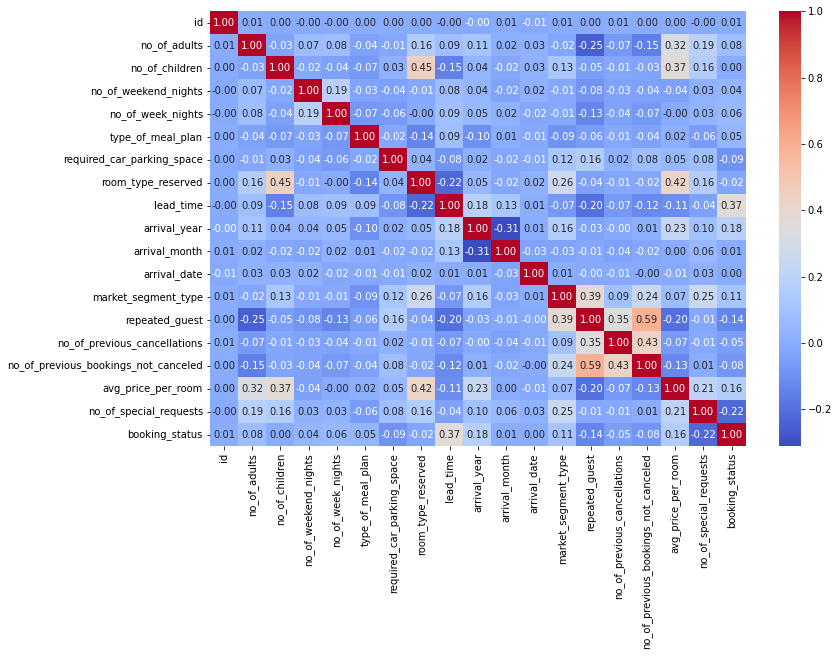

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr(), cmap = 'coolwarm', annot = True, fmt = ".2f")

* 예약을 미리할 수록 예약 취소를 한다.

## no_of_adults & no_of_children

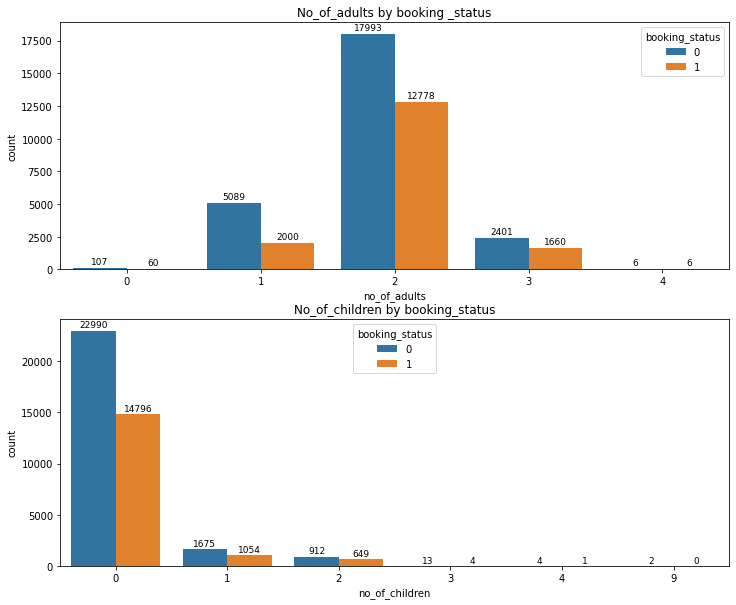

In [ ]:
f, ax = plt.subplots(2, 1, figsize = (12,10))

sns.countplot(data = df, x = 'no_of_adults', hue = 'booking_status', ax = ax[0])
ax[0].set_title('No_of_adults by booking _status')

for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)

sns.countplot(data = df, x = 'no_of_children', hue = 'booking_status', ax = ax[1])
ax[1].set_title('No_of_children by booking_status')

for p in ax[1].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[1].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)

* 어른 수는 2명 어린이 수는 0명인 고객이 가장 많았다.
* 어린이 수가 9명일 때 예약 취소를 한 고객은 없다.

* 어른 + 어린이 수가 많을수록 예약을 취소한 경우는 어느정도 일까?



In [ ]:
df_new = df.copy()

df_new['total_count'] = df_new['no_of_adults'] + df_new['no_of_children']

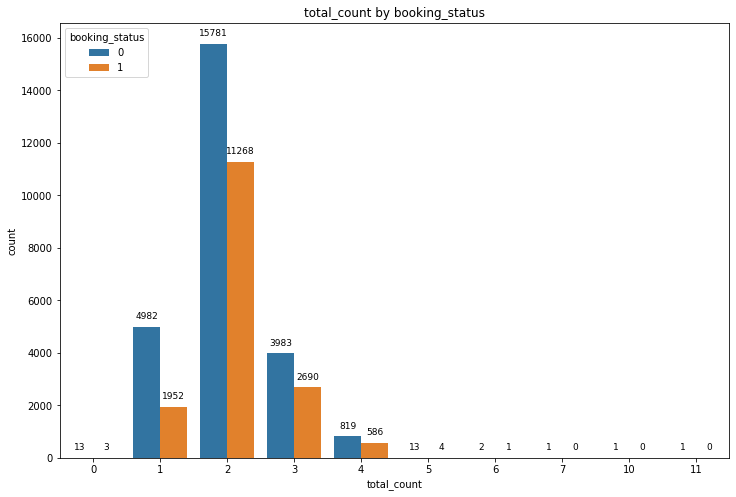

In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(data = df_new, x = 'total_count', hue = 'booking_status')

for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax.text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)
plt.title('total_count by booking_status')
plt.show()

In [ ]:
pd.crosstab(df['no_of_adults'], df['booking_status'], normalize = 'index')

booking_status,0,1
no_of_adults,,
0,0.640719,0.359281
1,0.717873,0.282127
2,0.584739,0.415261
3,0.591234,0.408766
4,0.500000,0.500000


In [ ]:
pd.crosstab(df['no_of_children'], df['booking_status'], normalize = 'index')

booking_status,0,1
no_of_children,,
0,0.608426,0.391574
1,0.613778,0.386222
2,0.584241,0.415759
3,0.764706,0.235294
4,0.800000,0.200000
9,1.000000,0.000000


In [ ]:
pd.crosstab(df_new['total_count'], df_new['booking_status'], normalize = 'index')

booking_status,0,1
total_count,,
0,0.812500,0.187500
1,0.718489,0.281511
2,0.583423,0.416577
3,0.596883,0.403117
4,0.582918,0.417082
5,0.764706,0.235294
6,0.666667,0.333333
7,1.000000,0.000000
10,1.000000,0.000000


* 인원이 엄청 많은 경우 예약 취소를 잘 하지 않았다.
* total_count가 0인 걸로 봐서 인원을 어른, 어린이로만 나눈 것은 아닌 것 같다.

## no_of_weekend_nights & no_of_week_nights

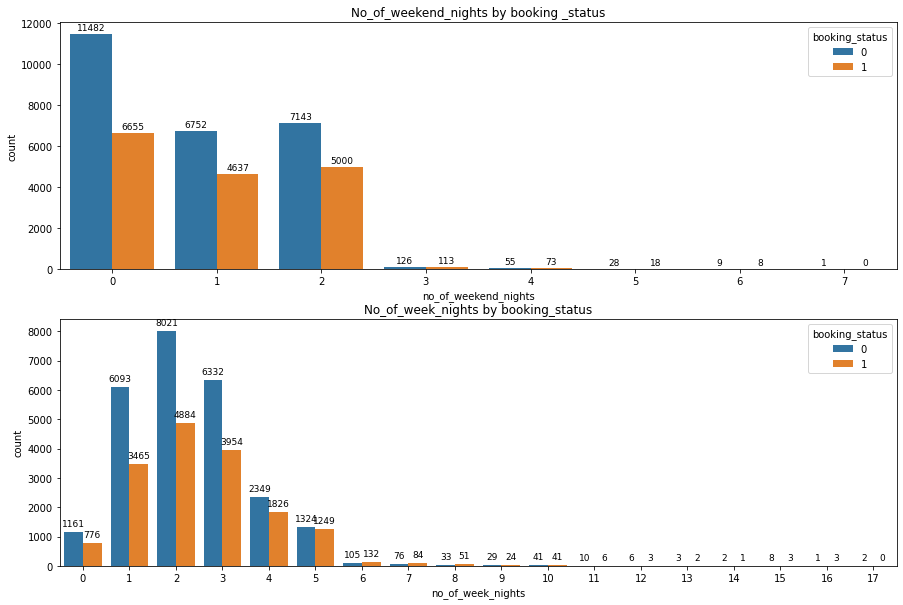

In [ ]:
f, ax = plt.subplots(2, 1, figsize = (15,10))


sns.countplot(data = df, x = 'no_of_weekend_nights', hue = 'booking_status', ax = ax[0])
ax[0].legend(title = 'booking_status', loc = 'upper right')
ax[0].set_title('No_of_weekend_nights by booking _status')
for p in ax[0].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[0].text(p.get_x() + p.get_width() / 2., height + 200, height, ha = 'center', size = 9)

sns.countplot(data = df, x = 'no_of_week_nights', hue = 'booking_status', ax = ax[1])
ax[1].legend(title = 'booking_status', loc = 'upper right')
ax[1].set_title('No_of_week_nights by booking_status')

for p in ax[1].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[1].text(p.get_x() + p.get_width() / 2., height + 200, height, ha = 'center', size = 9)


plt.show()

* 주말, 주중을 나눈 기준을 아직 파악하지 못했다.
* 우선, 주말/주중 상관없이 총 숙박일 수를 기준으로 예약 취소 현황을 살펴보자!!

In [ ]:
df_new = df.copy()

df_new['total_nights'] = df_new['no_of_weekend_nights'] + df_new['no_of_week_nights']
df_new['total_nights'].value_counts()

3     11843
4      8310
2      8282
1      5919
5      3717
7      1621
6      1531
8       255
10      152
9       139
0       114
11       48
14       39
13       33
12       29
15       27
16       11
18        8
21        6
20        6
17        4
23        2
22        2
19        2
Name: total_nights, dtype: int64

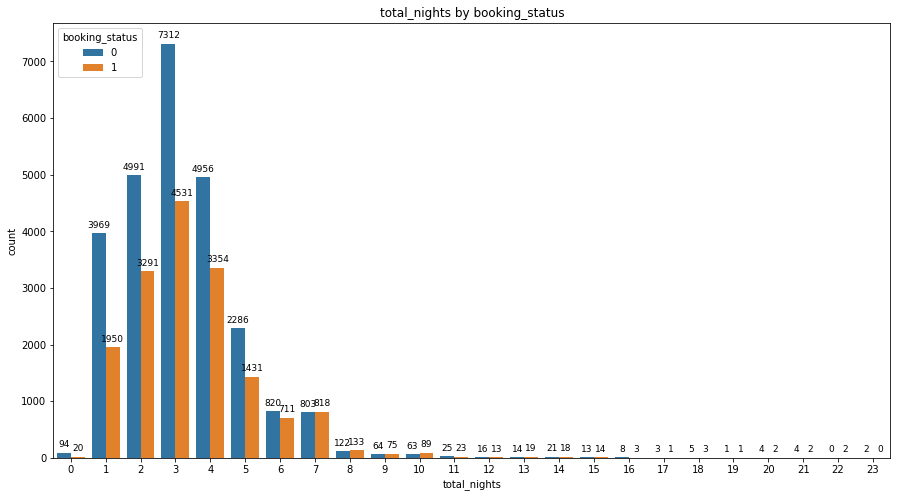

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data = df_new, x = 'total_nights', hue = 'booking_status')

for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.title('total_nights by booking_status')
plt.show()

In [ ]:
df_new[(df_new['total_nights'] == 22) | (df_new['total_nights'] == 23)]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
11529,11529,2,0,6,17,1,0,0,18,2018,11,14,1,0,0,0,75.82,0,0,23
12831,12831,1,0,6,17,0,0,0,9,2018,1,28,1,0,0,0,68.23,0,0,23
13392,13392,2,0,6,16,0,0,1,10,2018,4,16,1,0,0,0,128.86,0,1,22
20841,20841,1,0,6,16,0,0,0,109,2018,5,4,1,0,0,0,89.25,0,1,22


In [ ]:
df_new[df_new['no_of_weekend_nights'] == 7]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
37033,37033,1,0,7,1,0,0,0,111,2018,6,3,0,0,0,0,96.67,1,0,8


* 주말기준 7일을 숙박했는데 주중에 1일 숙박한게 가능한가??

## type_of_meal_plan & required_car_parking_space & 	room_type_reserved

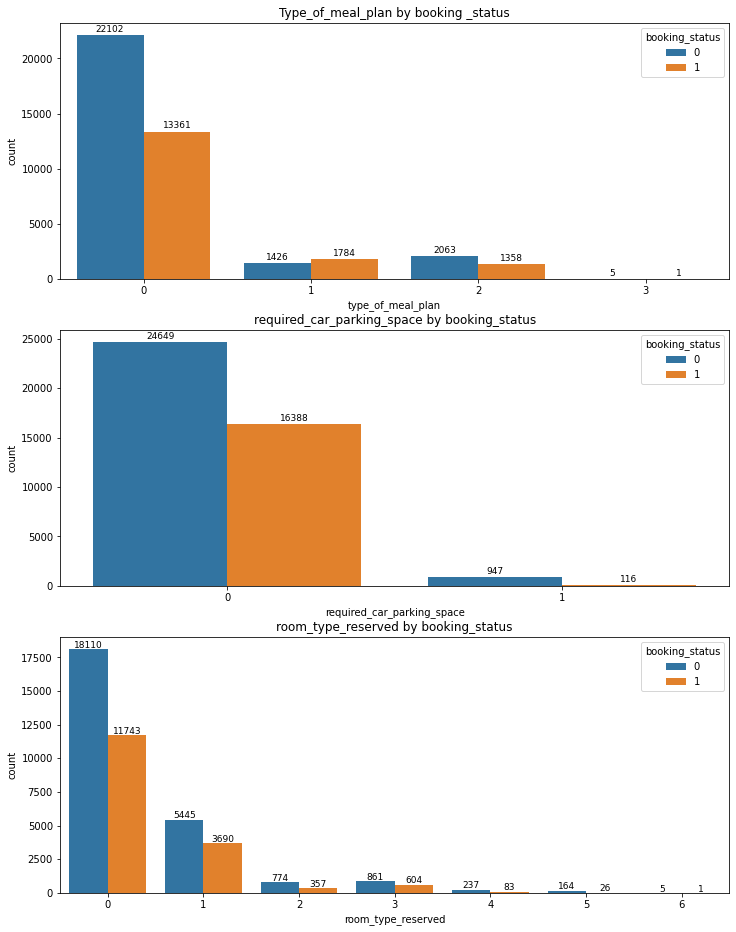

In [ ]:
f, ax = plt.subplots(3, 1, figsize = (12,16))

sns.countplot(data = df, x = 'type_of_meal_plan', hue = 'booking_status', ax = ax[0])
ax[0].set_title('Type_of_meal_plan by booking _status')

for p in ax[0].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[0].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)

sns.countplot(data = df, x = 'required_car_parking_space', hue = 'booking_status', ax = ax[1])
ax[1].set_title('required_car_parking_space by booking_status')

for p in ax[1].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[1].text(p.get_x() + p.get_width() / 2., height + 300, height, ha = 'center', size = 9)


sns.countplot(data = df, x = 'room_type_reserved', hue = 'booking_status', ax = ax[2])
ax[2].set_title('room_type_reserved by booking_status')

for p in ax[2].patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax[2].text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)

plt.show()

* 식사 유형이 1인 경우에 예약 취소를 더 많이 했다.

In [ ]:
# 식사 유형 1 살펴보기
df_meal1 = df[df['type_of_meal_plan'] == 1]
df_meal1

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
13,13,2,0,2,3,1,0,0,217,2018,8,22,1,0,0,0,63.75,0,1
32,32,2,0,0,2,1,0,0,317,2018,9,15,1,0,0,0,120.00,0,1
43,43,2,0,0,4,1,0,0,208,2018,7,30,1,0,0,0,80.75,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42003,42003,2,0,1,3,1,0,0,155,2018,7,17,1,0,0,0,103.50,2,1
42032,42032,2,0,0,3,1,0,0,73,2018,3,12,1,0,0,0,67.50,2,0
42047,42047,2,0,0,4,1,0,0,196,2018,8,9,1,0,0,0,85.50,1,1
42058,42058,2,0,1,2,1,0,0,115,2018,8,24,1,0,0,0,94.50,0,1


In [ ]:
df_meal1.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.0,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000,3210.000000
mean,20844.491900,1.901869,0.066355,0.951713,2.389408,1.0,0.022118,0.085981,130.917445,2017.965732,7.774143,16.070717,0.933956,0.005919,0.028037,0.017445,91.098243,0.578193,0.555763
std,12092.266922,0.315828,0.301066,0.930344,1.685940,0.0,0.147091,0.482240,67.690392,0.181945,2.666766,9.065926,0.277997,0.076719,0.549080,0.351741,21.649329,0.720287,0.496958
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10252.000000,2.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,94.250000,2018.000000,6.000000,8.000000,1.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,20815.000000,2.000000,0.000000,1.000000,2.000000,1.0,0.000000,0.000000,131.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,89.250000,0.000000,1.000000
75%,31366.500000,2.000000,0.000000,2.000000,3.000000,1.0,0.000000,0.000000,175.000000,2018.000000,10.000000,25.000000,1.000000,0.000000,0.000000,0.000000,103.500000,1.000000,1.000000
max,42091.000000,3.000000,2.000000,6.000000,17.000000,1.0,1.000000,5.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,11.000000,10.000000,231.000000,4.000000,1.000000


## lead_time

In [ ]:
print('예약한지 가장 오래된 일 수: {:.1f}'.format(df['lead_time'].max()))
print('예약한지 가장 최근 일 수 : {:.1f}'.format(df['lead_time'].min()))
print('평균: {:.1f}'.format(df['lead_time'].mean()))

예약한지 가장 오래된 일 수: 443.0
예약한지 가장 최근 일 수 : 0.0
평균: 103.9


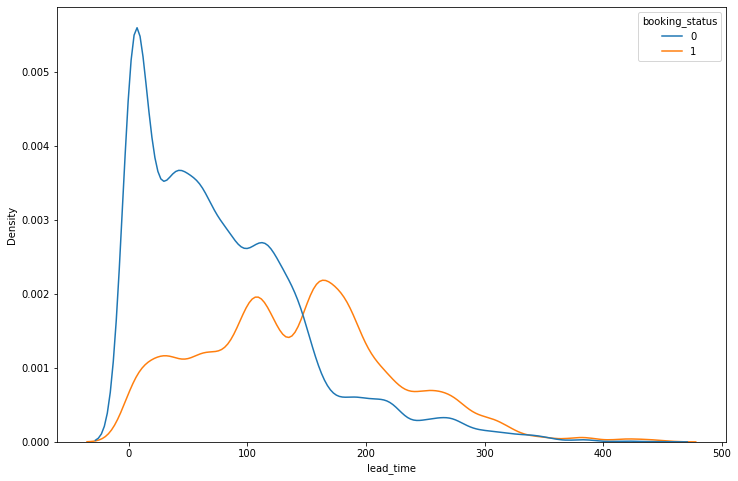

In [ ]:
plt.figure(figsize = (12, 8))
sns.kdeplot(data = df, x = 'lead_time', hue = 'booking_status')

* 예약한지 오래될수록 예약 취소한 경우가 많다.
* 약 160일 이상되면 고객들이 취소를 한다.

In [ ]:
df.groupby('booking_status')['lead_time'].agg(['mean', 'max', 'min'])

,mean,max,min
booking_status,,,
0,79.485466,443,0
1,141.733883,443,0


* 예약날짜와 도착날짜 사이의 일 수가 최소, 최대일 때 모두 예약 취소를 한적이 있고 안한적이 있지만 평균값으로 봤을때 사이의 일 수가 오래될수록 예약 취소를 했다.

## arrival_year, arrival_month, arrival_date

In [ ]:
df_date = df[['arrival_year', 'arrival_month', 'arrival_date', 'booking_status']]
df_date

,arrival_year,arrival_month,arrival_date,booking_status
0,2018,1,14,0
1,2018,7,29,0
2,2018,12,2,0
3,2018,12,1,0
4,2018,10,16,1
...,...,...,...,...
42095,2018,12,30,1
42096,2017,9,23,0
42097,2018,7,21,0
42098,2018,11,9,0


In [ ]:
df_date = df_date.astype({'arrival_year' : 'str', 'arrival_month' : 'str', 'arrival_date' : 'str'})
df_date

,arrival_year,arrival_month,arrival_date,booking_status
0,2018,1,14,0
1,2018,7,29,0
2,2018,12,2,0
3,2018,12,1,0
4,2018,10,16,1
...,...,...,...,...
42095,2018,12,30,1
42096,2017,9,23,0
42097,2018,7,21,0
42098,2018,11,9,0


In [ ]:
df_date['ymd'] = df_date['arrival_year'] + '-' + df_date['arrival_month'] + '-' + df_date['arrival_date']

In [ ]:
df_date['ymd'] = pd.to_datetime(df_date['ymd'])
df_date

ParserError: ignored

* 2018년 2월 29일은 존재하지 않음!!! 

# 4. 모델링

In [9]:
df_train = pd.read_csv('/content/drive/MyDrive/data/3-7/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data/3-7/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/data/3-7/sample_submission.csv')

## 1

In [11]:
# train 데이터 X, y 분리
X_train = df_train.drop(['id', 'booking_status'], axis = 1)
y_train = df_train['booking_status']

# test 데이터 id 제외
df_test = df_test.copy()
df_test_new = df_test.drop('id', axis = 1)

# 그리드서치를 하기 위한 여러 파라미터 설정
hyper_parameter = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [5, 10, 20]
}

# 그리드 서치로 최적의 파라미터 찾기
model = RandomForestClassifier(random_state = 42)
hyper_parameter_tuner = GridSearchCV(model, hyper_parameter, cv = 5)
hyper_parameter_tuner.fit(X_train, y_train)

# 최적의 파라미터
hyper_parameter_tuner.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [12]:
model = RandomForestClassifier(n_estimators = 300, max_depth = 10, criterion = 'entropy',random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict_proba(df_test_new)[:,1]

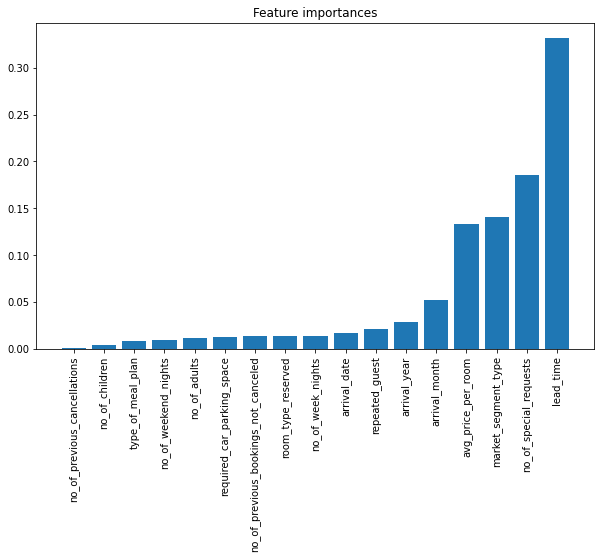

In [13]:
# 모델링에 사용된 변수들의 중요도 시각화
importances = model.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure(figsize = (10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X_train.columns[indices_sorted], rotation = 90)
plt.show()

In [15]:
sub['booking_status'] = predictions
sub.to_csv('/content/drive/MyDrive/data/3-7/sample_submission.csv', index = False)

# 1. Dataset 확인

In [16]:
df_train = pd.read_csv('/content/drive/MyDrive/data/3-7/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data/3-7/test.csv')

In [17]:
df_train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


* 예측하려는 target label은 booking_status 입니다.

* 변수 설명
    * no_of_adults : 성인 수
    * no_of_children : 어린이 수
    * no_of_weekend_nights : 숙박 수 (주말)
    * no_of_week_nights : 숙박 수 (평일)
    * type_of_meal_plan : 식사 유형
    * required_car_parking_space : 주차 공간 필요 여부(0 - 필요 없음, 1 - 필요 있음)
    * room_type_served : 예약한 객실 유형
    * lead_time : 예약 날짜와 입실 날짜 차이
    * arrival_year : 도착 날짜의 연도
    * arrival_month : 도착 날짜의 월
    * arrival_date : 도착 날짜
    * market_segment_type : ?
    * repeated_guest : 재방문 여부(0 - 재방문 X , 1 - 재방문 O)
    * no_of_previous_cancellations : 전에 취소한 예약 수
    * no_of_previous_bookings_not_canceled : 전에 취소하지 않은 예약 수
    * avg_price_per_room : 당일 평균 가격 예약(유동적, 단위 - 유로)
    * no_of_special_requests : 고객이 요청한 특별 요청 수(ex - 높은 층, 객실에서 보이는 전망 등)
    * booking_status : 예약 취소 여부(0 - 예약 취소 x / 1 - 예약 취소 o 

In [21]:
df_train.shape

(42100, 19)

In [22]:
df_test.shape

(28068, 18)

In [19]:
df_train.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [20]:
df_test.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,28068.000000,28068.000000,28068.000000,28068.00000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000
mean,56133.500000,1.915313,0.140872,0.88877,2.387559,0.234110,0.027006,0.430668,103.845554,2017.856705,7.583903,15.867643,0.725951,0.030711,0.024975,0.196736,104.644460,0.573643
std,8102.678014,0.526279,0.447277,0.87825,1.403213,0.581256,0.162103,0.830187,81.134833,0.350380,2.831911,8.934570,0.629044,0.172537,0.410583,1.941456,36.818948,0.769765
min,42100.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49116.750000,2.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000
50%,56133.500000,2.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,92.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,63150.250000,2.000000,0.000000,2.00000,3.000000,0.000000,0.000000,1.000000,154.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000
max,70167.000000,4.000000,9.000000,6.00000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000


* count에서 id 컬럼과 다른 숫자를 가진 컬럼이 없고 shape를 통해 나타난 행 개수와 차이가 없다.
    * null data가 없는 것 같다.

## 1.1 Null data check

In [28]:
for col in df_train.columns:
    msg = 'column : {:>40}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column :                                       id	 Percent of NaN value : 0.00%
column :                             no_of_adults	 Percent of NaN value : 0.00%
column :                           no_of_children	 Percent of NaN value : 0.00%
column :                     no_of_weekend_nights	 Percent of NaN value : 0.00%
column :                        no_of_week_nights	 Percent of NaN value : 0.00%
column :                        type_of_meal_plan	 Percent of NaN value : 0.00%
column :               required_car_parking_space	 Percent of NaN value : 0.00%
column :                       room_type_reserved	 Percent of NaN value : 0.00%
column :                                lead_time	 Percent of NaN value : 0.00%
column :                             arrival_year	 Percent of NaN value : 0.00%
column :                            arrival_month	 Percent of NaN value : 0.00%
column :                             arrival_date	 Percent of NaN value : 0.00%
column :                      market_seg

In [29]:
for col in df_test.columns:
    msg = 'column : {:>40}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column :                                       id	 Percent of NaN value : 0.00%
column :                             no_of_adults	 Percent of NaN value : 0.00%
column :                           no_of_children	 Percent of NaN value : 0.00%
column :                     no_of_weekend_nights	 Percent of NaN value : 0.00%
column :                        no_of_week_nights	 Percent of NaN value : 0.00%
column :                        type_of_meal_plan	 Percent of NaN value : 0.00%
column :               required_car_parking_space	 Percent of NaN value : 0.00%
column :                       room_type_reserved	 Percent of NaN value : 0.00%
column :                                lead_time	 Percent of NaN value : 0.00%
column :                             arrival_year	 Percent of NaN value : 0.00%
column :                            arrival_month	 Percent of NaN value : 0.00%
column :                             arrival_date	 Percent of NaN value : 0.00%
column :                      market_seg

* train, test 모두 null data가 존재하지 않는다.

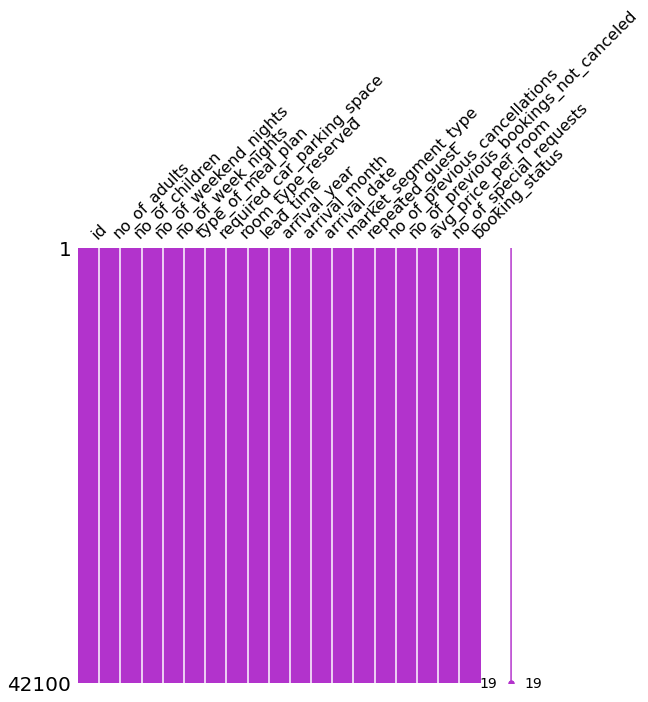

In [31]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.7, 0.2, 0.8))

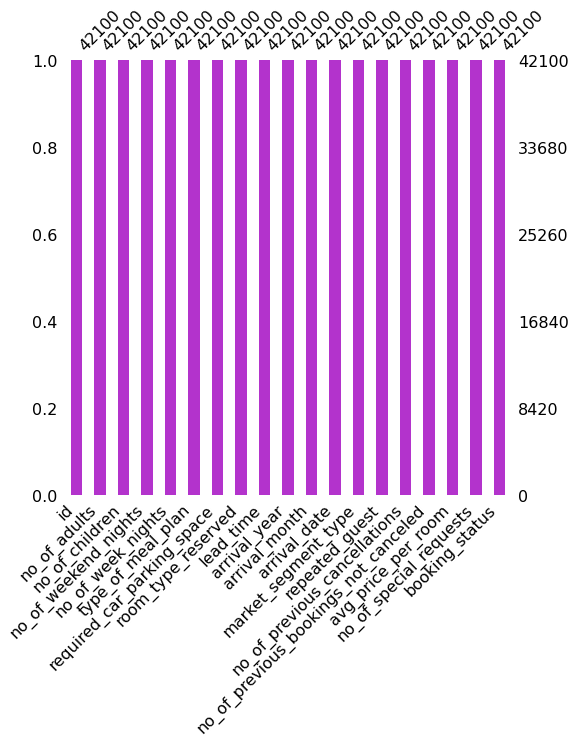

In [33]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.7, 0.2, 0.8))

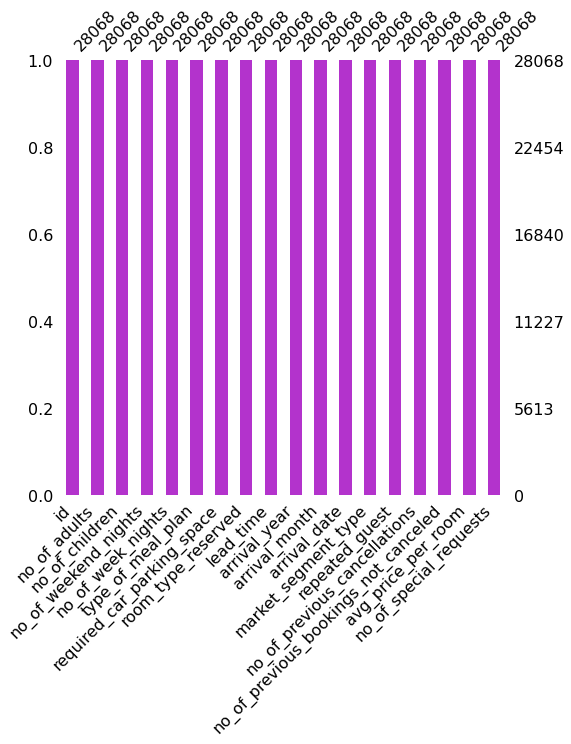

In [34]:
msno.bar(df = df_test.iloc[:, :], figsize = (8, 8), color = (0.7, 0.2, 0.8))

## 1.2 Target label 확인

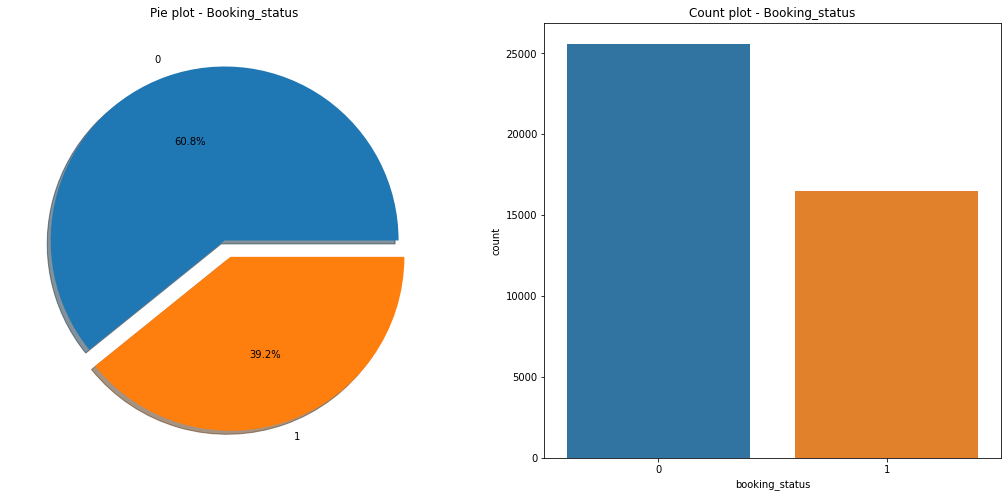

In [35]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['booking_status'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Booking_status')
ax[0].set_ylabel('')

sns.countplot(data = df_train, x = 'booking_status', ax = ax[1])
ax[1].set_title('Count plot - Booking_status')

plt.show()

* 예약을 취소하지 않은 사람이 더 많다.
* 39.2%가 예약을 취소했습니다.
* target label의 분포가 제법 균일하다.

# 2. Exploratory data analysis

In [115]:
def groupping(col, target):
    return df_train[[col, target]].groupby([col], as_index=True).agg(['count', 'sum', 'mean'])

def cross(col,target):
    return pd.crosstab(df_train[col], df_train[target], margins = True).style.background_gradient(cmap = 'winter_r')

def visaulization(col, target):
    f, ax = plt.subplots(3, 1, figsize = (12,15))

    sns.countplot(data = df_train, x = col, ax = ax[0])
    ax[0].set_title('No. Of {}'.format(col), y = 1.02)

    sns.countplot(data = df_train, x = col, hue = target, ax = ax[1])
    ax[1].set_title('Canceled countplot depending on {}'.format(col), y = 1.02)
    
    df_train[[col, target]].groupby([col], as_index = True).mean().sort_values(by= target, ascending=False).plot.bar(ax = ax[2])
    ax[2].set_title('Canceled rate depending on {}'.format(col), y = 1.02)

    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.show()


## 2.1 no_of_adults & no_of_children 

### no_of_adults

In [36]:
df_train[['no_of_adults', 'booking_status']].groupby(['no_of_adults'], as_index=True).count()

,booking_status
no_of_adults,
0,167
1,7089
2,30771
3,4061
4,12


In [38]:
# booking_status가 1인 개수
df_train[['no_of_adults', 'booking_status']].groupby(['no_of_adults'], as_index=True).sum()

,booking_status
no_of_adults,
0,60
1,2000
2,12778
3,1660
4,6


In [40]:
pd.crosstab(df_train['no_of_adults'], df_train['booking_status'], margins = True).style.background_gradient(cmap = 'winter_r')

booking_status,0,1,All
no_of_adults,,,
0,107,60,167
1,5089,2000,7089
2,17993,12778,30771
3,2401,1660,4061
4,6,6,12
All,25596,16504,42100


### no_of_children

In [43]:
df_train[['no_of_children', 'booking_status']].groupby(['no_of_children'], as_index=True).count()

,booking_status
no_of_children,
0,37786
1,2729
2,1561
3,17
4,5
9,2


In [44]:
# booking_status가 1인 개수
df_train[['no_of_children', 'booking_status']].groupby(['no_of_children'], as_index=True).sum()

,booking_status
no_of_children,
0,14796
1,1054
2,649
3,4
4,1
9,0


In [45]:
pd.crosstab(df_train['no_of_children'], df_train['booking_status'], margins = True).style.background_gradient(cmap = 'winter_r')

booking_status,0,1,All
no_of_children,,,
0,22990,14796,37786
1,1675,1054,2729
2,912,649,1561
3,13,4,17
4,4,1,5
9,2,0,2
All,25596,16504,42100


### 시각화

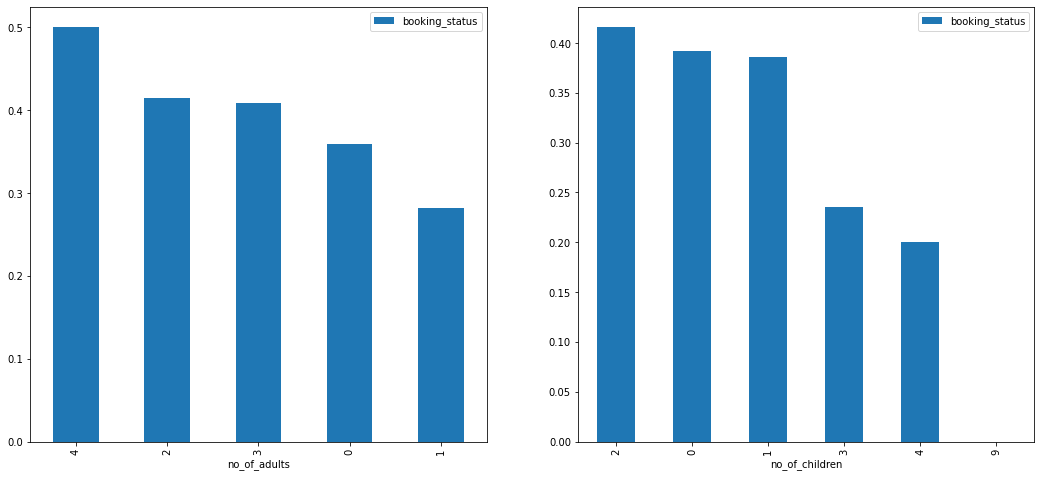

In [46]:
# groupby 후 mean을 하면 각 어른 수, 어린이 수 별 예약 취소율을 얻을 수 있다.
f, ax = plt.subplots(1, 2, figsize = (18, 8))

# no_of_adults
df_train[['no_of_adults', 'booking_status']].groupby(['no_of_adults'], as_index = True).mean().sort_values(by = 'booking_status', ascending=False).plot.bar(ax = ax[0])

# no_of_children
df_train[['no_of_children', 'booking_status']].groupby(['no_of_children'], as_index = True).mean().sort_values(by = 'booking_status', ascending=False).plot.bar(ax = ax[1])

* 어른 수가 많은 경우가 예약 취소 확률이 높은 것을 확인할 수 있습니다.
    * 4(50%) > 2(42%) > 3(41%) > 0(36%) > 1(28%)
* 어린이 수가 적은 경우가 예약 취소 확률이 높은 것을 확인할 수 있습니다.
    * 2(42%) > 0(39.2%) > 1(38.6%) > 3(24%) > 4(20%) > 9(0%)

### Familysize 변수 생성

* no_of_adults와 no_of_children을 합하면 family가 될 것 같다.

In [76]:
df_train['familysize'] = df_train['no_of_adults'] + df_train['no_of_children'] + 1
df_test['familysize'] = df_test['no_of_adults'] + df_test['no_of_children'] + 1

In [77]:
print("Maximum size of Family: ", df_train['familysize'].max())
print("Minimum size of Family: ", df_train['familysize'].min())

Maximum size of Family:  12
Minimum size of Family:  1


* 미국에서는 18세를 기준으로 성인과 미성년자를 구분 짓고 있다.
* 0인 경우가 있는 것으로 보아 예약자는 포함이 안되있는 것 같다.
    * familysize에 1을 더해주어야 할 것 같다.

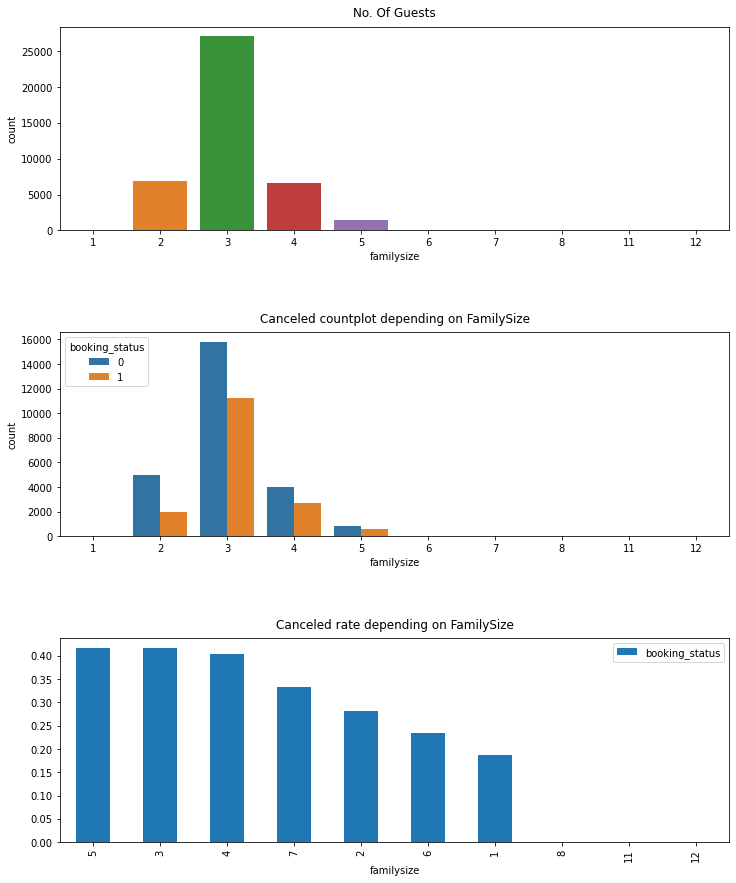

In [85]:
f, ax = plt.subplots(3, 1, figsize = (12,15))

sns.countplot(data = df_train, x = 'familysize', ax = ax[0])
ax[0].set_title('No. Of Guests', y = 1.02)

sns.countplot(data = df_train, x = 'familysize', hue = 'booking_status', ax = ax[1])
ax[1].set_title('Canceled countplot depending on FamilySize', y = 1.02)

df_train[['familysize', 'booking_status']].groupby(['familysize'], as_index = True).mean().sort_values(by='booking_status', ascending=False).plot.bar(ax = ax[2])
ax[2].set_title('Canceled rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

* 가족크기가 1~12까지 있고 대부분 3명이고 그 이후로는 2,4,5명이다.
* 5명인 경우가 가장 취소 확률이 높다. 
* 3~5명인 경우가 대체로 예약 취소를 하고 그 이상이거 이하인 경우는 취소확률이 낮아진다. 

## 2.2 no_of_weekend_nights & no_of_week_nights

### no_of_weekend_nights

In [86]:
df_train[['no_of_weekend_nights', 'booking_status']].groupby(['no_of_weekend_nights'], as_index=True).count()

,booking_status
no_of_weekend_nights,
0,18137
1,11389
2,12143
3,239
4,128
5,46
6,17
7,1


In [87]:
# booking_status가 1인 개수
df_train[['no_of_weekend_nights', 'booking_status']].groupby(['no_of_weekend_nights'], as_index=True).sum()

,booking_status
no_of_weekend_nights,
0,6655
1,4637
2,5000
3,113
4,73
5,18
6,8
7,0


In [88]:
pd.crosstab(df_train['no_of_weekend_nights'], df_train['booking_status'], margins = True).style.background_gradient(cmap = 'winter_r')

booking_status,0,1,All
no_of_weekend_nights,,,
0,11482,6655,18137
1,6752,4637,11389
2,7143,5000,12143
3,126,113,239
4,55,73,128
5,28,18,46
6,9,8,17
7,1,0,1
All,25596,16504,42100


### no_of_week_nights

In [89]:
df_train[['no_of_week_nights', 'booking_status']].groupby(['no_of_week_nights'], as_index=True).count()

,booking_status
no_of_week_nights,
0,1937
1,9558
2,12905
3,10286
4,4175
5,2573
6,237
7,160
8,84


In [91]:
# booking_status가 1인 개수
df_train[['no_of_week_nights', 'booking_status']].groupby(['no_of_week_nights'], as_index=True).sum()

,booking_status
no_of_week_nights,
0,776
1,3465
2,4884
3,3954
4,1826
5,1249
6,132
7,84
8,51


In [92]:
pd.crosstab(df_train['no_of_week_nights'], df_train['booking_status'], margins = True).style.background_gradient(cmap = 'winter_r')

booking_status,0,1,All
no_of_week_nights,,,
0,1161,776,1937
1,6093,3465,9558
2,8021,4884,12905
3,6332,3954,10286
4,2349,1826,4175
5,1324,1249,2573
6,105,132,237
7,76,84,160
8,33,51,84


### 시각화

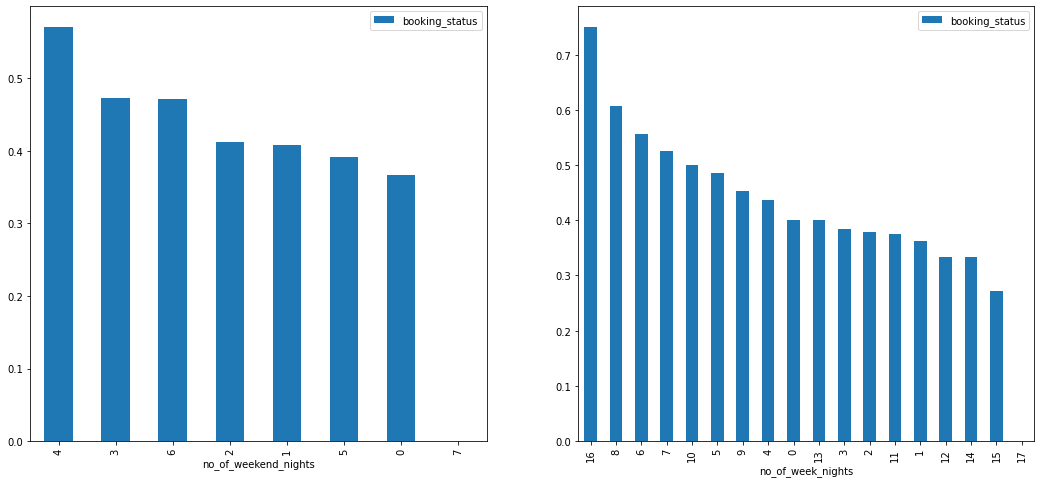

In [93]:
# groupby 후 mean을 하면 각 주말 숙박 수, 평일 숙박 수 별 예약 취소율을 얻을 수 있다.
f, ax = plt.subplots(1, 2, figsize = (18, 8))

# no_of_weekend_nights
df_train[['no_of_weekend_nights', 'booking_status']].groupby(['no_of_weekend_nights'], as_index = True).mean().sort_values(by = 'booking_status', ascending=False).plot.bar(ax = ax[0])

# no_of_week_nights
df_train[['no_of_week_nights', 'booking_status']].groupby(['no_of_week_nights'], as_index = True).mean().sort_values(by = 'booking_status', ascending=False).plot.bar(ax = ax[1])

* 주말 숙박을 4일 한 경우가 예약 취소 확률이 가장 높았다.
    * 총 숙박을 9일 ~ 19일 사이가 예약 취소 확률이 높았다고 할 수 있다. 
* 평일 숙박을 16일 한 경우가 예약 취소 확률이 가장 높았다.
    * 총 숙박을 16일 ~ 24일  사이가 예약 취소 확률이 높았다고 할 수 있다.

In [97]:
# 주말 숙박이 4일인 경우
df_train[df_train['no_of_weekend_nights'] == 4]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,familysize
934,934,2,0,4,6,1,0,0,12,2018,2,20,1,0,0,0,79.00,1,0,3
1004,1004,2,0,4,6,0,0,0,95,2018,4,17,1,0,0,0,72.80,0,0,3
1456,1456,1,0,4,5,2,0,0,7,2018,9,21,0,0,0,0,296.00,0,0,2
1663,1663,2,0,4,6,1,0,0,240,2018,12,31,1,0,0,0,70.55,0,1,3
1788,1788,1,0,4,6,0,0,0,8,2017,9,3,1,0,0,0,98.50,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39470,39470,2,0,4,5,0,0,1,207,2018,8,24,1,0,0,0,123.25,1,1,3
39535,39535,2,0,4,11,1,0,0,11,2018,11,14,1,0,0,0,75.86,0,1,3
41118,41118,2,0,4,8,0,0,1,36,2018,3,1,1,0,0,0,131.40,0,1,3
41631,41631,2,0,4,10,0,0,0,19,2017,11,2,1,0,0,0,90.95,2,0,3


In [98]:
# 평일 숙박이 16일인 경우
df_train[df_train['no_of_week_nights'] == 16]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,familysize
13392,13392,2,0,6,16,0,0,1,10,2018,4,16,1,0,0,0,128.86,0,1,3
20841,20841,1,0,6,16,0,0,0,109,2018,5,4,1,0,0,0,89.25,0,1,2
31520,31520,3,0,5,16,0,0,0,87,2017,7,16,1,0,0,0,14.25,2,0,4
31522,31522,3,0,5,16,0,0,1,165,2018,7,18,1,0,0,0,130.05,2,1,4


In [94]:
# 주말 숙박이 7일인 경우
df_train[df_train['no_of_weekend_nights'] == 7]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,familysize
37033,37033,1,0,7,1,0,0,0,111,2018,6,3,0,0,0,0,96.67,1,0,2


* 주말 숙박이 7일인데 평일 숙박이 1일일 수 있을까??

In [95]:
# 평일 숙박이 17일인 경우
df_train[df_train['no_of_week_nights'] == 17]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,familysize
11529,11529,2,0,6,17,1,0,0,18,2018,11,14,1,0,0,0,75.82,0,0,3
12831,12831,1,0,6,17,0,0,0,9,2018,1,28,1,0,0,0,68.23,0,0,2


### total_nights 변수 생성

* no_of_weekend_nights와 no_of_week_nights을 합하면 total_nights가 될 것 같다.
* total_nights가 16 ~ 19 사이일 때 취소확률이 높게 나타날 것 같다.

In [99]:
df_train['total_nights'] = df_train['no_of_weekend_nights'] + df_train['no_of_week_nights']
df_test['total_nights'] = df_test['no_of_weekend_nights'] + df_test['no_of_week_nights']

In [100]:
print("Maximum nights: ", df_train['total_nights'].max())
print("Minimum nights: ", df_train['total_nights'].min())

Maximum nights:  23
Minimum nights:  0


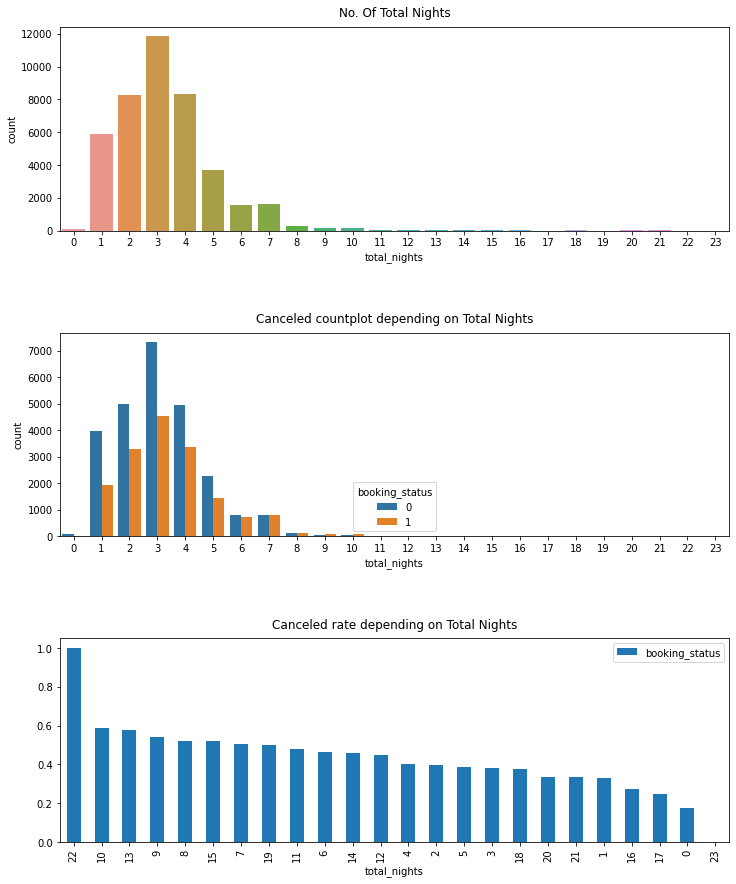

In [101]:
f, ax = plt.subplots(3, 1, figsize = (12,15))

sns.countplot(data = df_train, x = 'total_nights', ax = ax[0])
ax[0].set_title('No. Of Total Nights', y = 1.02)

sns.countplot(data = df_train, x = 'total_nights', hue = 'booking_status', ax = ax[1])
ax[1].set_title('Canceled countplot depending on Total Nights', y = 1.02)

df_train[['total_nights', 'booking_status']].groupby(['total_nights'], as_index = True).mean().sort_values(by='booking_status', ascending=False).plot.bar(ax = ax[2])
ax[2].set_title('Canceled rate depending on Total Nights', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

* 총 숙박일 수가 0일~23일까지 있고 대부분 3일이고 그 이후로는 2,4,1일이다.
* 22일인 경우가 가장 취소 확률이 높다.
    * 22일인 경우가 적기 때문일수 있다.
* 예상했던 16 ~ 19일 사이의 취소확률은 그리 높지 않다. 

## 2.3 type_of_meal_plan

In [109]:
groupping('type_of_meal_plan','booking_status')

booking_status                 
                           count    sum      mean
type_of_meal_plan                                
0                          35463  13361  0.376759
1                           3210   1784  0.555763
2                           3421   1358  0.396960
3                              6      1  0.166667

In [111]:
cross('type_of_meal_plan', 'booking_status')

booking_status,0,1,All
type_of_meal_plan,,,
0,22102,13361,35463
1,1426,1784,3210
2,2063,1358,3421
3,5,1,6
All,25596,16504,42100


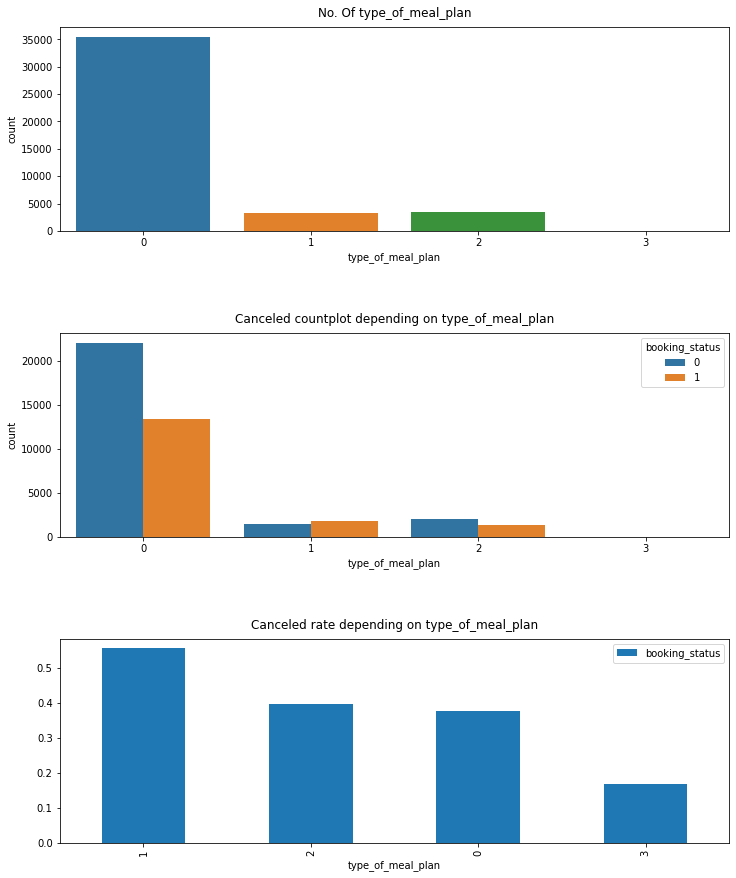

In [116]:
visaulization('type_of_meal_plan', 'booking_status')

* 식사 유형은 총 4가지가 있고 대부분 0 유형을 많이 먹는다.
* 식사 유형이 1인 경우가 가장 취소 확률이 높다.
    * 유일하게 1인 경우가 취소확률이 취소 안한 확률 보다 높다.

## 2.4 required_car_parking_space

In [118]:
groupping('required_car_parking_space','booking_status')

booking_status                 
                                    count    sum      mean
required_car_parking_space                                
0                                   41037  16388  0.399347
1                                    1063    116  0.109125

In [119]:
cross('required_car_parking_space', 'booking_status')

booking_status,0,1,All
required_car_parking_space,,,
0,24649,16388,41037
1,947,116,1063
All,25596,16504,42100


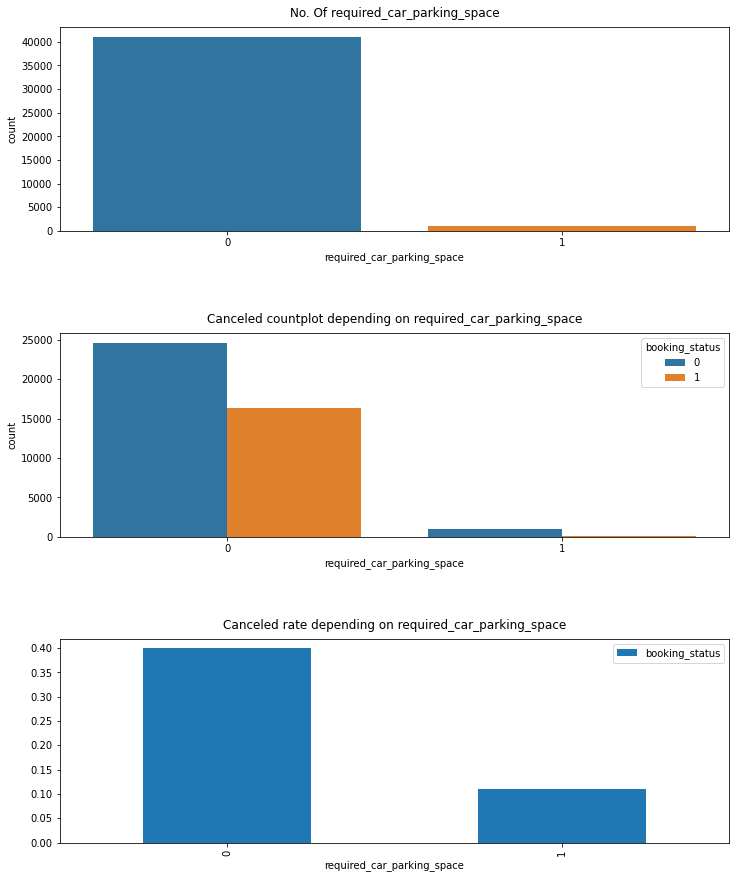

In [117]:
visaulization('required_car_parking_space', 'booking_status')

* 대부분의 사람들은 주차 공간을 요구하지 않는다.
* 주차 공간을 요구하지 않는 사람들이 취소확률이 더 높다.
* 이번 변수의 분포가 균일하지 않기 때문에 유의미한 결과를 줄 수 있지는 않을 것 같다.
* special request에 영향을 줄까?
    * 주차 공간을 필요료 하는 사람들은 모두 특별 요청 사항이 1개 이상일지...

## 2.1 lead_time

In [51]:
print('제일 차이 많이 나는 일 수: {:.1f} Days'.format(df_train['lead_time'].max()))
print('제일 차이 적게 나는 일 수 : {:.1f} Days'.format(df_train['lead_time'].min()))
print('평균 차이 일 수: {:.1f} Days'.format(df_train['lead_time'].mean()))

제일 차이 많이 나는 일 수: 443.0 Days
제일 차이 적게 나는 일 수 : 0.0 Days
평균 차이 일 수: 103.9 Days


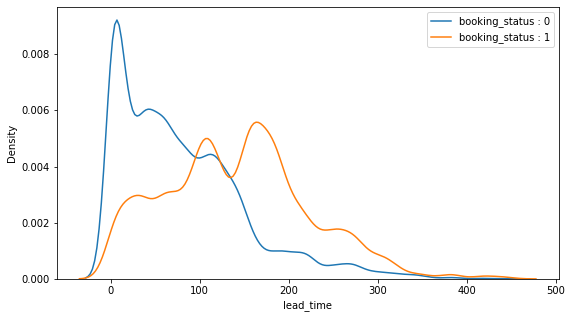

In [59]:
# 예약 취소에 따른 lead time histogram
fig, ax = plt.subplots(1, 1, figsize = (9, 5))

sns.kdeplot(df_train[df_train['booking_status'] == 0]['lead_time'], ax = ax)

sns.kdeplot(df_train[df_train['booking_status'] == 1]['lead_time'], ax = ax)

plt.legend(['booking_status : 0', 'booking_status : 1'])
plt.show()

* 대체로 예약을 100일 이상 전에 한 경우가 예약 취소를 많이 했다.

In [60]:
# 다른 변수와의 비교

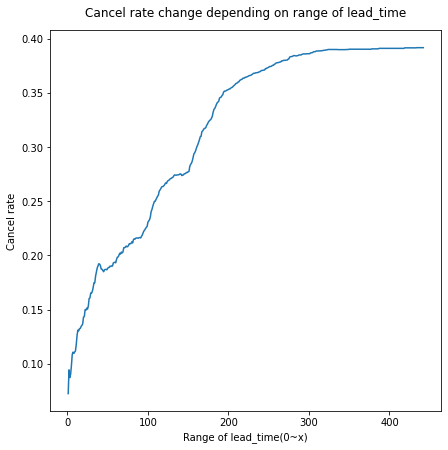

In [62]:
cummulate_cancel_ratio = []
for i in range(0, 443):
    cummulate_cancel_ratio.append(df_train[df_train['lead_time'] < i]['booking_status'].sum() / len(df_train[df_train['lead_time'] < i]['booking_status']))

plt.figure(figsize = (7, 7))
plt.plot(cummulate_cancel_ratio)
plt.title('Cancel rate change depending on range of lead_time', y = 1.02)
plt.ylabel('Cancel rate')
plt.xlabel('Range of lead_time(0~x)')
plt.show()

* 예약을 미리 할수록 예약 취소율이 확실히 높아지고 있다.

## 2.2 no_of_special_requests 

In [64]:
df_train[['no_of_special_requests', 'booking_status']].groupby(['no_of_special_requests'],as_index = True).count()

,booking_status
no_of_special_requests,
0,24554
1,11885
2,4900
3,660
4,100
5,1


In [65]:
# booking_status가 1인 개수
df_train[['no_of_special_requests', 'booking_status']].groupby(['no_of_special_requests'], as_index=True).sum()

,booking_status
no_of_special_requests,
0,11710
1,3666
2,1123
3,5
4,0
5,0


In [66]:
pd.crosstab(df_train['no_of_special_requests'], df_train['booking_status'], margins = True).style.background_gradient(cmap = 'winter_r')

booking_status,0,1,All
no_of_special_requests,,,
0,12844,11710,24554
1,8219,3666,11885
2,3777,1123,4900
3,655,5,660
4,100,0,100
5,1,0,1
All,25596,16504,42100


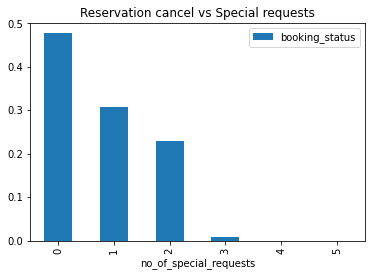

In [73]:
df_train[['no_of_special_requests', 'booking_status']].groupby(['no_of_special_requests'], as_index = True).mean().sort_values(by = 'booking_status', ascending=False).plot.bar()
plt.title('Reservation cancel vs Special requests')
plt.show()

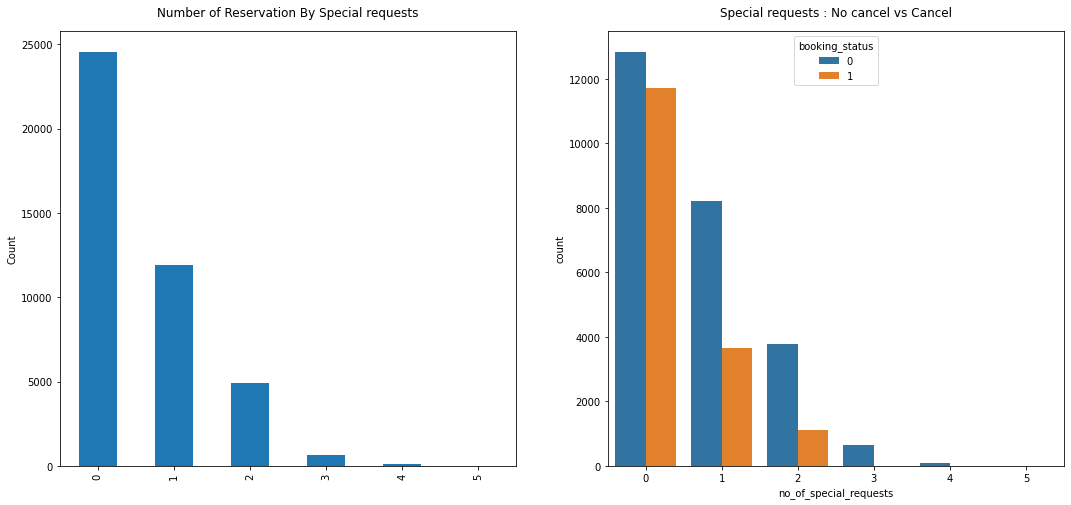

In [69]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['no_of_special_requests'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Reservation By Special requests', y = y_position)
ax[0].set_ylabel('Count')

sns.countplot(data = df_train, x = 'no_of_special_requests', hue = 'booking_status', ax = ax[1])
ax[1].set_title('Special requests : No cancel vs Cancel', y = y_position)

plt.show()

* 특별 요청이 적을 수록, 예약 취소 확률이 높은걸 확인할 수 있습니다.
    * 0(48%) > 1(31%) > 2(23%) > 3(1%) > 4(0%) > 5(0%)

## 2.3 market_segment_type

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['no_of_special_requests'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Reservation By Special requests', y = y_position)
ax[0].set_ylabel('Count')

sns.countplot(data = df_train, x = 'no_of_special_requests', hue = 'booking_status', ax = ax[1])
ax[1].set_title('Special requests : No cancel vs Cancel', y = y_position)

plt.show()